# Lab 1

In [2]:
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Python for Time Series Analysis

/content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Python for Time Series Analysis


In [3]:
import pandas as pd

In [50]:
# Load the data
df = pd.read_csv("train.csv")
df.head()

/tmp/ipython-input-1977667516.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [51]:
# Preview the df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [52]:
# print Unique values in 'StateHoliday' and their counts
print(df['StateHoliday'].value_counts())

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [53]:
# StateHoliday contains flags ('a','b','c' or 0). We'll binarize to 1 if any letter else 0.
df["StateHoliday"] = df["StateHoliday"].isin(["a", "b", "c"]).astype(int)

In [54]:
# print Unique values in 'StateHoliday' and their counts
print(df['StateHoliday'].value_counts())

StateHoliday
0    986159
1     31050
Name: count, dtype: int64


# Lab 2

In [55]:
# How many stores do we have
print(f"There are {len(df.Store.unique())} stores")

There are 1115 stores


In [56]:
# Subset to 10 random stores with seed 1502
df_10 = df[df.Store.isin(df.Store.sample(10, random_state = 1502))]
df_10.Store.unique()

array([ 24,  47, 156, 264, 267, 353, 763, 794, 862, 864])

In [57]:
# compute the mean sales for each store and sort ascendingly
df_10.groupby('Store')['Sales'].mean().sort_values(ascending=False)

,Sales
Store,
24,7763.773885
267,7731.106157
862,7128.519108
47,5946.666667
264,5851.901274
156,5779.171975
353,5579.376858
763,5097.873673
864,3520.780255


In [58]:
# Find the day per store with the all time high in sales
df_10.groupby('Store')['Sales'].idxmax()

,Sales
Store,
24,408443
47,34611
156,627115
264,455513
267,245014
353,101817
763,619917
794,245456
862,627821


# Lab 3

In [59]:
# Set "Date" in the index
df_10.set_index("Date", inplace=True)
df_10.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1
2015-07-31,47,5,9379,1021,1,1,0,1
2015-07-31,156,5,8828,821,1,1,0,1
2015-07-31,264,5,8303,992,1,1,0,1
2015-07-31,267,5,11326,1217,1,1,0,1


In [60]:
# Set the index to a to_datetime
df_10.index = pd.to_datetime(df_10.index)

In [63]:
# Compute the average sale per weekday and per store
df_10.groupby(["DayOfWeek", 'Store'])['Sales'].mean()

DayOfWeek  Store
1          24       10860.119403
           47        7877.686567
           156       8707.940299
           264       8320.291045
           267       8969.253731
                        ...     
7          353       7255.343284
           763          0.000000
           794          0.000000
           862          0.000000
           864          0.000000
Name: Sales, Length: 70, dtype: float64

<Axes: xlabel='DayOfWeek'>

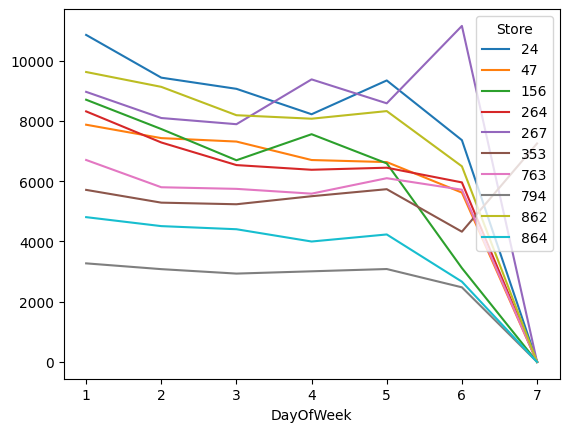

In [65]:
# Visualize the average sale per weekday and per store
df_10.groupby(["DayOfWeek", 'Store'])['Sales'].mean().unstack().plot()

# Lab 4

In [66]:
# Create a function to standardize the values and compute the standardized mean per weekday and per store
def standardize(s):
    return (s - s.mean()) / s.std()

In [70]:
# 2. Standardize Sales *within each Store*
df_10.loc[:,"Sales_std"] = df_10.groupby("Store")["Sales"].transform(standardize)

In [71]:
# 3. Compute the standardized mean per weekday and per store
std_mean = df_10.groupby(["DayOfWeek", "Store"])["Sales_std"].mean()
print(std_mean)

DayOfWeek  Store
1          24       0.725087
           47       0.621004
           156      0.799508
           264      0.702281
           267      0.293913
                      ...   
7          353      1.070822
           763     -1.945422
           794     -1.999880
           862     -1.901085
           864     -1.848743
Name: Sales_std, Length: 70, dtype: float64


<Axes: title={'center': 'Standardized Mean Sales per Weekday and Store'}, xlabel='DayOfWeek'>

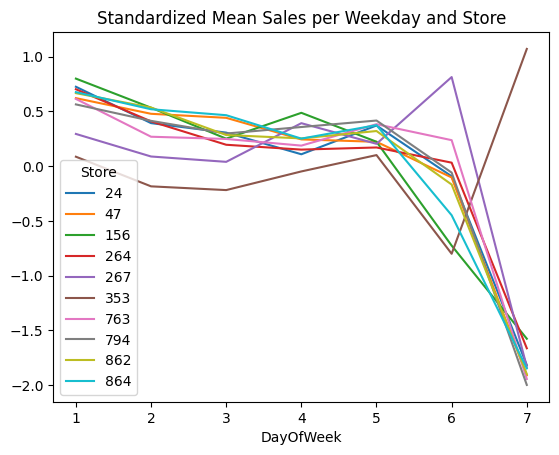

In [72]:
# 4. (Optional) Visualize the standardized mean per weekday and store
std_mean.unstack().plot(title="Standardized Mean Sales per Weekday and Store")

# Lab 5

In [73]:
import matplotlib.pyplot as plt

In [74]:
# Filter to DayOfWeek 7
df_d7 = df_10[df_10["DayOfWeek"] == 7]

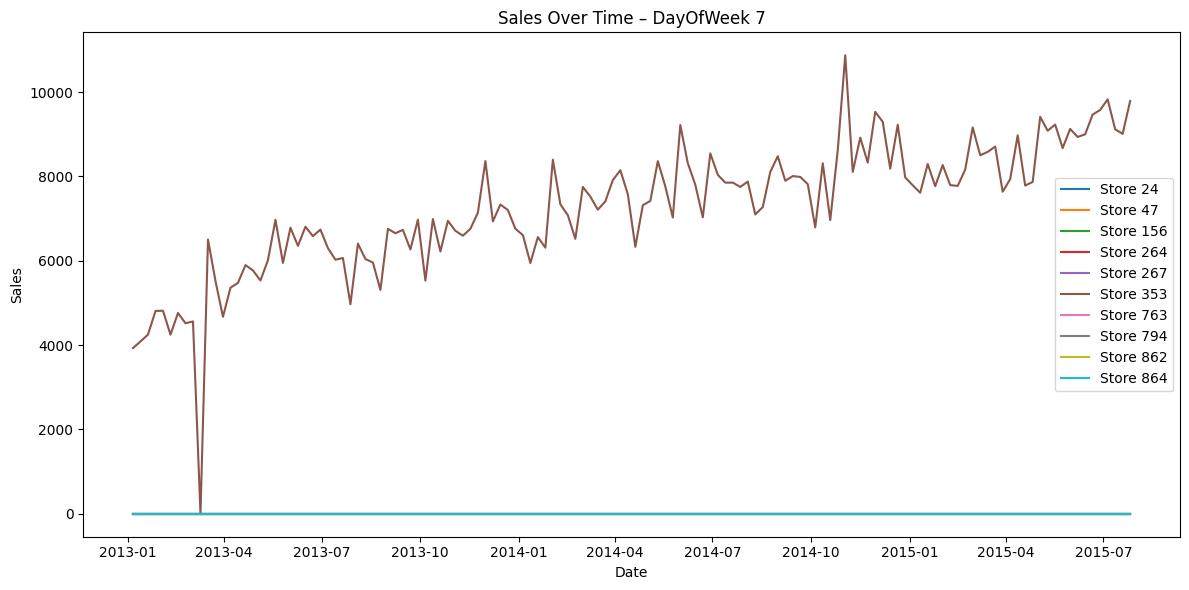

In [77]:
# Plot each store as its own line
plt.figure(figsize=(12, 6))

for store, data in df_d7.groupby("Store"):
    plt.plot(data.index, data["Sales"], label=f"Store {store}")

plt.title("Sales Over Time – DayOfWeek 7")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

# Lab 6

In [78]:
# Remove DayOfWeek 7 and Store 353
df_clean = df_10[(df_10["DayOfWeek"] != 7) & (df_10["Store"] != 353)].copy()

In [79]:
# Re-standardize the sales
df_clean["Sales_std"] = df_clean.groupby("Store")["Sales"].transform(standardize)

In [81]:
# Aggregate the data
intra_week = df_clean.groupby(["DayOfWeek", "Store"])["Sales_std"].mean()
intra_week

DayOfWeek  Store
1          24       0.583938
           47       0.448952
           156      0.650245
           264      0.537160
           267     -0.014565
           763      0.442577
           794      0.370730
           862      0.514525
           864      0.520087
2          24       0.125676
           47       0.237571
           156      0.328951
           264      0.166980
           267     -0.302294
           763     -0.082517
           794      0.130444
           862      0.321881
           864      0.299821
3          24       0.005941
           47       0.183134
           156     -0.013220
           264     -0.102272
           267     -0.370267
           763     -0.113523
           794     -0.054303
           862     -0.045844
           864      0.223219
4          24      -0.266648
           47      -0.108194
           156      0.272225
           264     -0.158074
           267      0.122480
           763     -0.205699
           794      0.040688
           862     -0.091072
           864     -0.078232
5          24       0.095782
           47      -0.140735
           156     -0.047480
           264     -0.133529
           267     -0.140573
           763      0.091647
           794      0.135310
           862      0.007623
           864      0.095131
6          24      -0.544397
           47      -0.622010
           156     -1.194753
           264     -0.308573
           267      0.710373
           763     -0.130171
           794     -0.624750
           862     -0.708550
           864     -1.064054
Name: Sales_std, dtype: float64

<Axes: title={'center': 'Intra-Week Seasonality (Standardized Sales)'}, xlabel='DayOfWeek'>

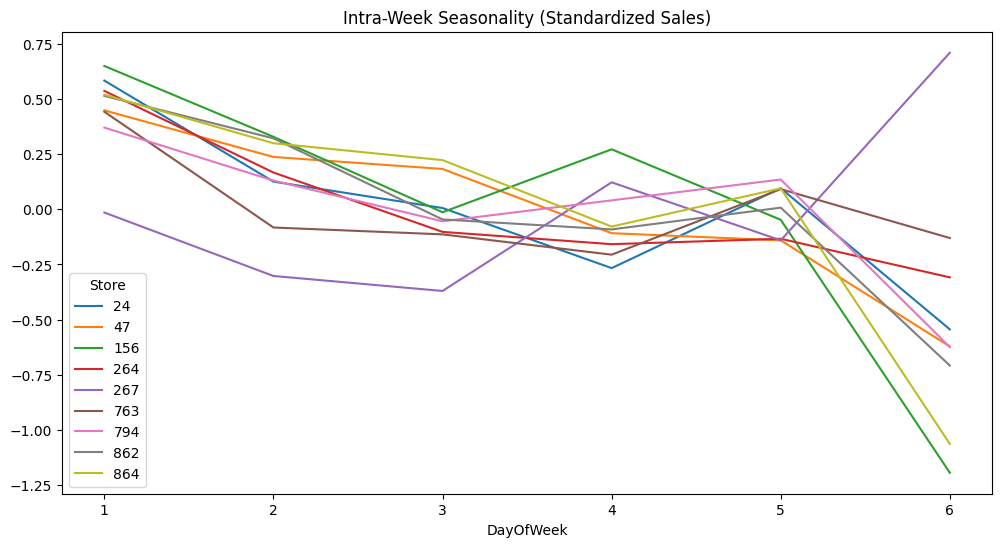

In [82]:
# Step 4 — Visualize intra-week seasonality
intra_week.unstack().plot(figsize=(12,6),
                          title="Intra-Week Seasonality (Standardized Sales)")

# Lab 7

In [86]:
# A. Average sales on Promo vs non-Promo days
df.groupby("Promo")["Sales"].mean()

,Sales
Promo,
0,4406.050805
1,7991.152046


In [90]:
# Promo effect per store
promo_uplift = df.groupby(["Store", "Promo"])["Sales"].mean().unstack()

In [91]:
# Find the top 5 and bottom 5 stores in terms of relative promot uplift
promo_uplift["diff"] = (promo_uplift[1] - promo_uplift[0]) / promo_uplift[0]
promo_uplift

Promo,0,1,diff
Store,,,
1,3198.994845,5152.886111,0.610783
2,2855.058419,6172.816667,1.162063
3,3967.596220,8608.666667,1.169744
4,6568.939863,10370.511111,0.578719
5,2582.271478,5944.266667,1.301953
...,...,...,...
1111,3073.487973,6395.294444,1.080794
1112,5975.537801,12490.363889,1.090249
1113,4400.362543,7320.086111,0.663519


In [93]:
# Find the top 5  stores in terms of relative promot uplift
promo_uplift['diff'].nlargest(5)

,diff
Store,
198,2.258195
607,1.889831
543,1.759064
575,1.737234
271,1.620440


In [95]:
# Find the bottom 5  stores in terms of relative promot uplift
promo_uplift['diff'].nsmallest(5)

,diff
Store,
274,-0.061742
262,0.021504
948,0.028717
676,0.036924
353,0.045898
